In [20]:
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
from scipy.io import loadmat, savemat
from matplotlib.colors import LogNorm
import math

In [21]:
# TO-DO
# Create average peak current density plot - kA/km^2/year


In [22]:
'This functions returns a 2D array containing the peak current density of each bin'
def computeCountDensity(dictionary):
       # H is the values in each bin
       # xedges are the bin edges along 1st dimension (lon)
       # yedges are the ones along 2nd dimension (lat)
       # for the count statistic, values not referenced since count computes count of points (lat lon coordinates) in each bin
       # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic_2d.html

       # meshgrid returns 2d array 
       # XX is the lon values: 2d array containing 100 arrays of the same xedges (lon values) 
       # YY is the lat values: 2d array containing 100 arrays from lowest to highest with each array containing 100 of the same values

       xedges = dictionary["XX"][0]
       yedges = dictionary["YY"][:,1]
       H = dictionary["H"]
       H = np.ma.masked_where(H==0, H) # wamasking where there was no data

       newH = []
       for j in range(len(H.T)):
              latCoordinate1 = yedges[j]
              latCoordinate2 = yedges[j+1]
              countAtLat = H.T[j]
              placeholder = []
              for i in range(len(H.T)):  
                     lonCoordinate1 = xedges[i]
                     lonCoordinate2 = xedges[i+1]

                     # compute area of one bin using haversine formula 
                     binArea = 1 
                     R = 6371e3; # meters
                     
                     # compute dist btw 2 latitudes
                     φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
                     φ2 = latCoordinate2 * math.pi/180 
                     Δφ = (latCoordinate2-latCoordinate1) * math.pi/180
                     Δλ = (lonCoordinate1-lonCoordinate1) * math.pi/180
                     a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
                     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
                     d1 = (R * c) / 1000; # dist in metres

                     # compute dist btw 2 longitudes
                     φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
                     φ2 = latCoordinate1 * math.pi/180 
                     Δφ = (latCoordinate1-latCoordinate1) * math.pi/180
                     Δλ = (lonCoordinate2-lonCoordinate1) * math.pi/180
                     a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
                     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
                     d2 = (R * c) / 1000 # dist in metres
                     
                     binArea = d1 * d2
                     
                     # dividing each peak current count by area 
                     averagePeakCurrent = (countAtLat[i]) / binArea
                     placeholder.append(averagePeakCurrent)
                     #print(placeholder)

              newH.append(placeholder)
       return newH

def computeAverageDensity(dictionary):
       xedges = dictionary["XX"][0]
       yedges = dictionary["YY"][:,1]
       H = dictionary["H"]
       #H = np.ma.masked_where(H==0, H) # wamasking where there was no data

       newH = []
       for j in range(len(H.T)):
              latCoordinate1 = yedges[j]
              latCoordinate2 = yedges[j+1]
              averageAtLat = H.T[j]
              placeholder = []
              for i in range(len(H.T)):  
                     lonCoordinate1 = xedges[i]
                     lonCoordinate2 = xedges[i+1]

                     # compute area of one bin using haversine formula 
                     binArea = 1 
                     R = 6371e3; # meters
                     
                     # compute dist btw 2 latitudes
                     φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
                     φ2 = latCoordinate2 * math.pi/180 
                     Δφ = (latCoordinate2-latCoordinate1) * math.pi/180
                     Δλ = (lonCoordinate1-lonCoordinate1) * math.pi/180
                     a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
                     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
                     d1 = (R * c) / 1000; # dist in metres

                     # compute dist btw 2 longitudes
                     φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
                     φ2 = latCoordinate1 * math.pi/180 
                     Δφ = (latCoordinate1-latCoordinate1) * math.pi/180
                     Δλ = (lonCoordinate2-lonCoordinate1) * math.pi/180
                     a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
                     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
                     d2 = (R * c) / 1000 # dist in metres
                     
                     binArea = d1 * d2
                     
                     # dividing each peak current average by area 
                     averagePeakCurrent = (averageAtLat[i]**2) / binArea
                     placeholder.append(averagePeakCurrent)
                     #print(placeholder)

              newH.append(placeholder)
       return newH

In [23]:
def plot(season, year, file, count, title, label, param):
    if param == "Count":
        res = computeCountDensity(file)
    elif param == "Average":
        res = computeAverageDensity(file)
    res = np.ma.masked_where(res==0, res) # wamasking where there was no data

    # plotting data    
    plt.subplot(2,2,count)
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c') # creating basemap object
    CS = m.pcolormesh(file["XX"],file["YY"], res, alpha = 0.85, shading='auto', cmap=plt.cm.viridis, norm = LogNorm())
    m.drawcoastlines()# draw coastlines, lat/lon lines.
    m.drawparallels(np.arange(-90.,90.,30.), labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.), labels=[1,1,0,1], rotation=45)
    cb = m.colorbar(CS,location = "bottom",label=label,size="5%", pad='15%') # draw colorbar

    if season == "Winter":
        plt.title('Dec/Jan/Feb ({}) {}'.format(year, title), fontsize=15)
        plt.xlabel('Longitude',labelpad=30, fontsize=15)
        plt.ylabel('Latitude',labelpad=40, fontsize=15)
    elif season == "Spring":
        plt.title('March/April/May ({}) {}'.format(year, title), fontsize=15)
        plt.xlabel('Longitude', labelpad=30,fontsize=15)
        plt.ylabel('Latitude', labelpad=40,fontsize=15)
    elif season == "Summer":
        plt.title('June/July/August ({}) {}'.format(year, title), fontsize=15)
        plt.xlabel('Longitude', labelpad=30,fontsize=15)
        plt.ylabel('Latitude', labelpad=40,fontsize=15)
    elif season == "Fall":
        plt.title('Sept/Oct/Nov ({}) {}'.format(year, title), fontsize=15)
        plt.xlabel('Longitude', labelpad=30, fontsize=15)
        plt.ylabel('Latitude', labelpad=40, fontsize=15)

    plt.gcf().set_size_inches(20,12)

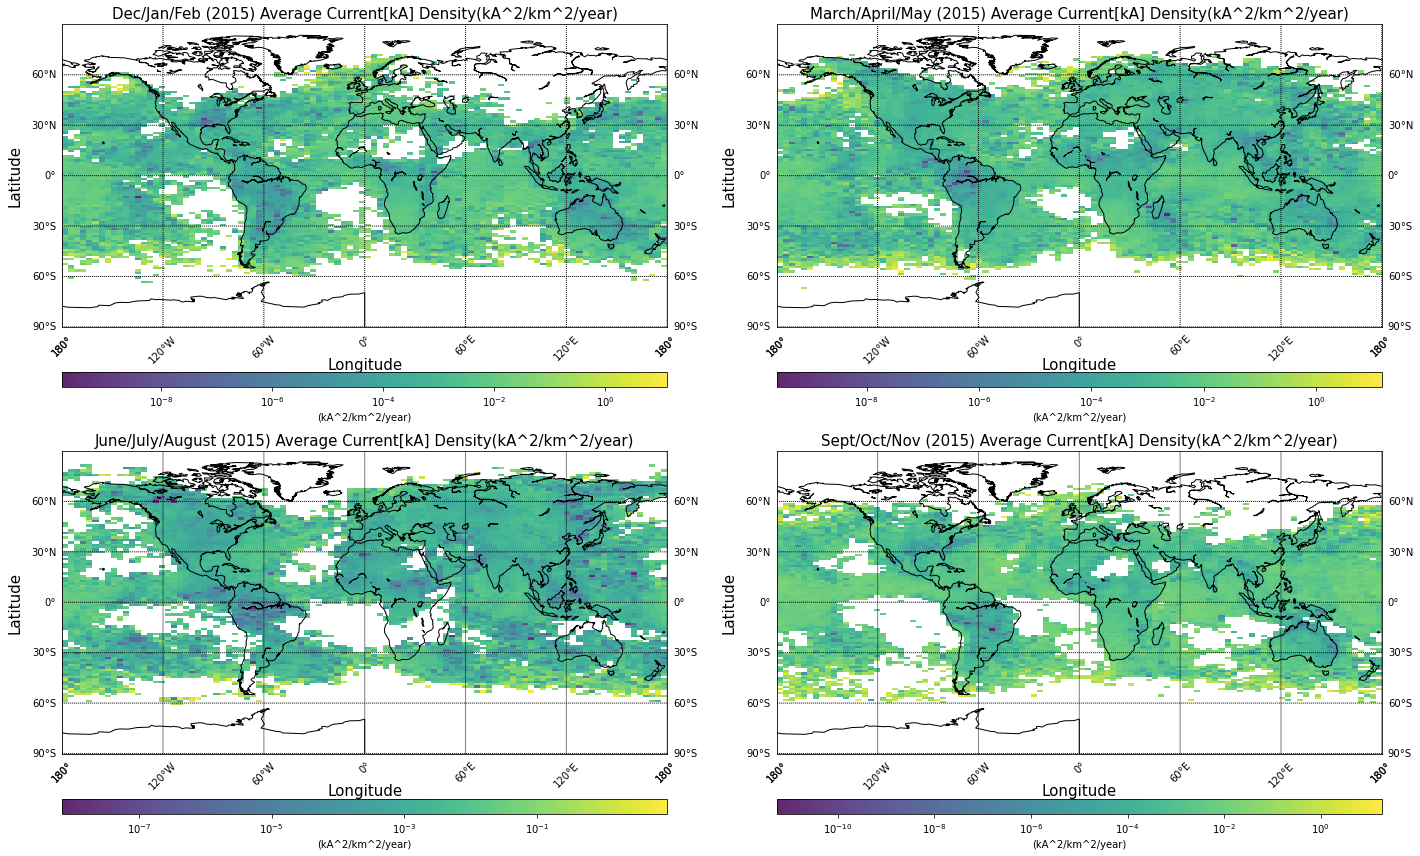

In [26]:
def plotAll():
    count = 0
    for season in ["Winter", "Spring", "Summer", "Fall"]:
        file = np.load("2015/Data/averages/"+season+".npz") # passing in scipy stats data to plotting function
        count += 1
        plot(season, year = 2015, file=file, count=count, title="Average Current[kA] Density(kA^2/km^2/year)", label="(kA^2/km^2/year)", param="Average")

    plt.tight_layout()
    plt.savefig("2015/2015PeakCurrentDensity", facecolor='w')

In [25]:
#dictionary = np.load('2015/Fall.npz', allow_pickle = True)
#computeCurrentDensity(dictionary)